In [1]:
import tensorflow as tf

# Intialization of fixed tensors

In [2]:
tf.zeros(2)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 0.], dtype=float32)>

In [5]:
tf.zeros((2,5,2))

<tf.Tensor: shape=(2, 5, 2), dtype=float32, numpy=
array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]], dtype=float32)>

Immutable and mutable variables.

number inside array. if you can change some number inside array then it is mutable. otherwise it is immutable.

in python the first element place is 0th row and 0th column. but in real life it is the 1st row and 1st column.'

In [4]:
x = tf.constant([[1.,2.,3.],
                [4.,5.,6]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


# Broadcasting

* This concept is brorowed from the equivalent feature in NumPy.

In [8]:
a = tf.constant([1.0,2.0,3.0])
b = tf.constant([2.0,2.0,2.0])
a*b

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 4., 6.], dtype=float32)>

In [9]:
a = tf.constant([1.0,2.0,3.0])
b = 2
a*b

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 4., 6.], dtype=float32)>

In [11]:
x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [12]:
x + x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [13]:
5*x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

In [16]:
# Matrix Multiplication
x@tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [9]:
tf.concat([x,x,x], axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [10]:
tf.concat([x,x,x], axis=-1)

<tf.Tensor: shape=(2, 9), dtype=float32, numpy=
array([[1., 2., 3., 1., 2., 3., 1., 2., 3.],
       [4., 5., 6., 4., 5., 6., 4., 5., 6.]], dtype=float32)>

# tf.Variable

In [17]:
var = tf.Variable([0.0,0.0,0.0],dtype=tf.float32)
var

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

In [18]:
var.assign([1,2,3])
var

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [19]:
var.assign_add([1,1,1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

In [20]:
var.shape

TensorShape([3])

# Automatic differentiation:

In [21]:
%%latex
$$ x = 1.0 $$
$$ f(x) = x^2 +2x -5 $$   
$$ f(x) = 1^2 +2*1 -5 = -2 $$   
$$ d(f(x))/dx = 2x +2 = 4 $$   

<IPython.core.display.Latex object>

In [22]:
x = tf.Variable(1.0)

In [23]:
def f(x):
    y = x**2 + 2*x -5
    return y

In [24]:
with tf.GradientTape() as tape:
    y = f(x)

In [25]:
g_x = tape.gradient(y,x) #g(x) =dy/dx
g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

# Training loops

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [20]:
x = tf.linspace(-2, 2, 201)
print(x.dtype)
x = tf.cast(x, tf.float32)
print(x.dtype)

<dtype: 'float64'>
<dtype: 'float32'>


In [21]:
def f(x):
    y = x**2 + 2*x -5
    return y

In [22]:
y = f(x) + tf.random.normal(shape =[201])

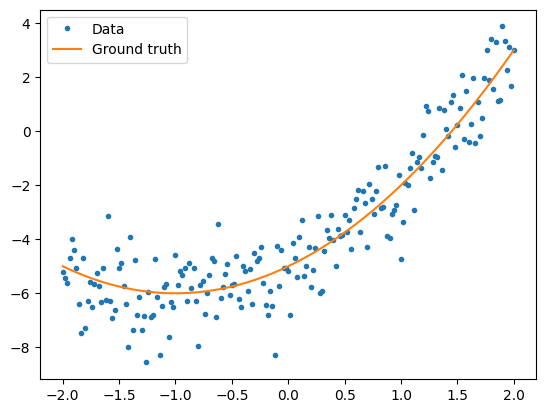

In [23]:
from cProfile import label
plt.plot(np.array(x), np.array(y),".", label = "Data")
plt.plot(x, f(x),  label='Ground truth')
plt.legend()

In [24]:
class Model(tf.keras.Model):
    def __init__(self, units):
        super().__init__()
        self.dense1 = tf.keras.layers.Dense(units = units,
                                            activation=tf.nn.relu,
                                            kernel_initializer=tf.random.normal,
                                            bias_initializer=tf.random.normal)
        self.dense2 = tf.keras.layers.Dense(1)
    
    def call(self, x, training=True):
        #For Keras layers/models, implement `call` instaed of `__call__`.
        x = x[:, tf.newaxis]
        x = self.dense1(x)
        x = self.dense2(x)
        return tf.squeeze(x, axis=1)
        

In [25]:
# variables = Model.variables
# optimizer = tf.optimizers.SGD(learning_rate =0.01)
# for step in range(1000):
#     with tf.GradientTape() as tape:
#         prediction = Model(x)
#         # breakpoint()
#         error = (y-prediction)**2
#         mean_error = tf.reduce_mean(error)
#     gradient = tape.gradient(mean_error, variables)
#     optimizer.apply_gradients(zip(gradient, variables))
    
#     if step %100 == 0:
#         print(f'Mean squared error: {mean_error.np():0.3f}')

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
    y = x**2 + 2*x -5
    return y
y = f(x) + tf.random.normal(shape =[201])

class Model(tf.keras.Model):
    def __init__(self, units):
        super().__init__()
        self.dense1 = tf.keras.layers.Dense(units = units,
                                            activation=tf.nn.relu,
                                            kernel_initializer=tf.random.normal,
                                            bias_initializer=tf.random.normal)
        self.dense2 = tf.keras.layers.Dense(1)
    
    def call(self, x, training=True):
        #For Keras layers/models, implement `call` instaed of `__call__`.
        x = x[:, tf.newaxis]
        x = self.dense1(x)
        x = self.dense2(x)
        return tf.squeeze(x, axis = 1)
        

new_model = Model(64)
new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.optimizers.SGD(learning_rate=0.01))

history = new_model.fit(x, y,epochs=100,batch_size=32,verbose=0)


In [27]:
history.model

Text(0.5, 1.0, 'Keras training progress')

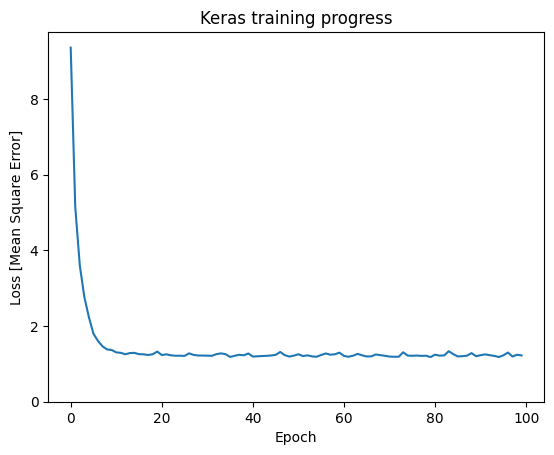

In [28]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Square Error]')
plt.title('Keras training progress')

# tf.data - input pipeline

In [29]:
dataset = tf.data.Dataset.from_tensor_slices([8,3,0,8,2,1])
dataset

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

# tf.data - NumPy Arrays

In [30]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train
images = images/255

dataset = tf.data.Dataset.from_tensor_slices((images, labels))

*Label Description*
* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boo

In [56]:
class_names = list(set(labels))

In [55]:
from collections import defaultdict, Counter
Counter(labels)

Counter({9: 6000,
         0: 6000,
         3: 6000,
         2: 6000,
         7: 6000,
         5: 6000,
         1: 6000,
         6: 6000,
         4: 6000,
         8: 6000})

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# mnist_fashion = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boo"]
class_name = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boo"]
print("Bfr transform: ",class_name)
class_name = le.fit_transform(class_name)
print("After transform: ",class_name)
le.inverse_transform(class_name)
print("After inverse transform: ",class_name)

Bfr transform:  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boo']
After transform:  [8 9 4 3 2 5 6 7 1 0]
After inverse transform:  [8 9 4 3 2 5 6 7 1 0]


Text(0.5, 1.0, '0')

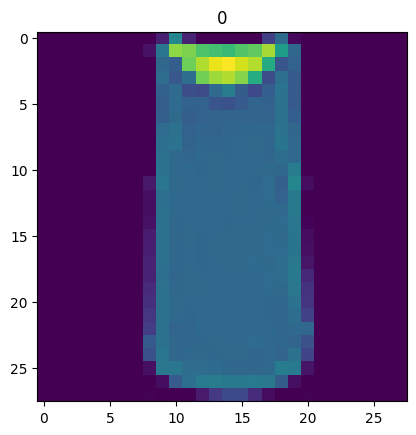

In [51]:
import matplotlib.pyplot as plt
index = 2
image_info = images[index]
label = labels[index]
plt.imshow(images[2])
plt.title(str(label))

# tf.data - text data

In [32]:
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ['cowper.txt', 'derby.txt','butler.txt']

file_paths = [tf.keras.utils.get_file(file_name, directory_url + file_name)
              for file_name in file_names]


In [33]:
dataset = tf.data.TextLineDataset(file_paths)
for line in dataset.take(5):
    print(line.numpy())

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'


In [34]:
len(list(list(dataset.as_numpy_iterator())))

49608

# tf.data Prprocessing data

In [35]:
import pathlib


flowers_root = tf.keras.utils.get_file(
    'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',untar=True
)
flowers_root = pathlib.Path(flowers_root)

In [36]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))
for file_path in list_ds.take(5):
    print(file_path.numpy())

b'C:\\Users\\phvpa\\.keras\\datasets\\flower_photos\\roses\\2364976562_a184463083_m.jpg'
b'C:\\Users\\phvpa\\.keras\\datasets\\flower_photos\\dandelion\\14886963928_d4856f1eb6_n.jpg'
b'C:\\Users\\phvpa\\.keras\\datasets\\flower_photos\\sunflowers\\8071460469_a7c2c34b97_n.jpg'
b'C:\\Users\\phvpa\\.keras\\datasets\\flower_photos\\tulips\\8659691170_09db83d023.jpg'
b'C:\\Users\\phvpa\\.keras\\datasets\\flower_photos\\roses\\9609569441_eeb8566e94.jpg'


In [37]:
import glob
list_imgs = list(flowers_root.glob('*/*'))
image_count = len(list_imgs)
print(image_count)

3670


In [38]:
import cv2
def show_img(win="img", img=None,Time = -1):
    cv2.namedWindow(win, cv2.WINDOW_GUI_NORMAL)
    cv2.imshow(win, img)
    k = cv2.waitKey(Time)
    if k == 27 or k==ord('q'):         # wait for ESC key to exit
        cv2.destroyAllWindows()
    elif k == ord('s'): # wait for 's' key to save and exit
        cv2.imwrite('messigray.png',img)
        cv2.destroyAllWindows()

In [39]:
img_path = str(list_imgs[0])
img = cv2.imread(img_path)
print(img.shape)
win = "img"
show_img(win,img)

(263, 320, 3)


In [40]:
import os
def parse_image(filename):
    parts = tf.strings.split(filename,os.sep)
    label = parts[-2]
    image = tf.io.read_file(filename)
    image = tf.io.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image,[128,128])
    return(image,label)    

In [41]:
file_path = next(iter(list_ds))
image, label = parse_image(file_path)

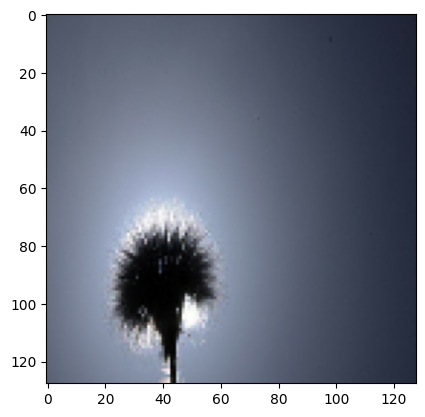

In [42]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(image)

# tf.data - time series windowing:

In [74]:
range_ds = tf.data.Dataset.range(100000)

In [75]:
batches = range_ds.batch(10)
for batch in batches.take(5):
    print(batch.numpy())

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]


In [77]:
def densr_1_step(batch):
    return batch[:-1], batch[1:]

predict_dense_1_step = batches.map(densr_1_step)
for features, label in predict_dense_1_step.take(5):
    print(features.numpy(),"==>",label.numpy())

[0 1 2 3 4 5 6 7 8] ==> [1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18] ==> [11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28] ==> [21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38] ==> [31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48] ==> [41 42 43 44 45 46 47 48 49]


# Text Vectorization:

## Reffer text_classification.ipynb

# Sampling random tensors:

In [ ]:
a = tf.random.normal((2,2), mean=0, stddev=1)

# Graph calulation

In [117]:
import timeit
from datetime import datetime

In [118]:
# Define a Python function.
def a_regular_function(x, y, b):
  x = tf.matmul(x, y)
  x = x + b
  return x

# `a_function_that_uses_a_graph` is a TensorFlow `Function`.
a_function_that_uses_a_graph = tf.function(a_regular_function)

# Make some tensors.
x1 = tf.constant([[1.0, 2.0]])
y1 = tf.constant([[2.0], [3.0]])
b1 = tf.constant(4.0)

orig_value = a_regular_function(x1, y1, b1).numpy()
# Call a `Function` like a Python function.
tf_function_value = a_function_that_uses_a_graph(x1, y1, b1).numpy()
assert(orig_value == tf_function_value)

# @tf.funcion

In [119]:
def inner_function(x, y, b):
  x = tf.matmul(x, y)
  x = x + b
  return x

# Use the decorator to make `outer_function` a `Function`.
@tf.function
def outer_function(x):
  y = tf.constant([[2.0], [3.0]])
  b = tf.constant(4.0)

  return inner_function(x, y, b)

# Note that the callable will create a graph that
# includes `inner_function` as well as `outer_function`.
outer_function(tf.constant([[1.0, 2.0]])).numpy()

array([[12.]], dtype=float32)

In [120]:
def simple_relu(x):
  if tf.greater(x, 0):
    return x
  else:
    return 0

# `tf_simple_relu` is a TensorFlow `Function` that wraps `simple_relu`.
tf_simple_relu = tf.function(simple_relu)

print("First branch, with graph:", tf_simple_relu(tf.constant(1)).numpy())
print("Second branch, with graph:", tf_simple_relu(tf.constant(-1)).numpy())

First branch, with graph: 1
Second branch, with graph: 0


In [121]:
# This is the graph-generating output of AutoGraph.
print(tf.autograph.to_code(simple_relu))

def tf__simple_relu(x):
    with ag__.FunctionScope('simple_relu', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (do_return, retval_)

        def set_state(vars_):
            nonlocal do_return, retval_
            (do_return, retval_) = vars_

        def if_body():
            nonlocal do_return, retval_
            try:
                do_return = True
                retval_ = ag__.ld(x)
            except:
                do_return = False
                raise

        def else_body():
            nonlocal do_return, retval_
            try:
                do_return = True
                retval_ = 0
            except:
                do_return = False
                raise
        ag__.if_stmt(ag__.converted_call(ag__.ld(tf).greater, (ag__.ld(x), 0), None, fscope), if_bo

In [122]:
# This is the graph itself.
print(tf_simple_relu.get_concrete_function(tf.constant(1)).graph.as_graph_def())

node {
  name: "x"
  op: "Placeholder"
  attr {
    key: "_user_specified_name"
    value {
      s: "x"
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "shape"
    value {
      shape {
      }
    }
  }
}
node {
  name: "Greater/y"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 0
      }
    }
  }
}
node {
  name: "Greater"
  op: "Greater"
  input: "x"
  input: "Greater/y"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "cond"
  op: "StatelessIf"
  input: "Greater"
  input: "x"
  attr {
    key: "Tcond"
    value {
      type: DT_BOOL
    }
  }
  attr {
    key: "Tin"
    value {
      list {
        type: DT_INT32
      }
    }
  }
  attr {
    key: "Tout"
    value {
      list {
        type: DT_BOOL
        type: DT_INT32
      }
    }
  